In [1]:
import luna as ln
import gefera as gf

In [2]:
t = np.linspace(67.5, 68.8, 10000)

ap = 1.0
tp = 0.2
ep = 0.2
pp = 365
wp = 0.1 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.007
tm = -2.1
em = 0.1
pm = 3.
om = 0.1 * np.pi / 180
wm = 90 * np.pi / 180
im = 88.0 * np.pi / 180
mm = 0.01

u1 = 0.5
u2 = 0.3
rp = 0.1
rm = 0.05

In [3]:
bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = ln.System(bo, mo)
%time lc_luna = sys.lightcurve(t, u1, u2, rp, rm)

CPU times: user 11.3 ms, sys: 3.48 ms, total: 14.7 ms
Wall time: 15.6 ms


In [4]:
bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(bo, mo)
%time lc_gefera = sys.lightcurve(t, u1, u2, rp, rm)

CPU times: user 8.3 ms, sys: 2.93 ms, total: 11.2 ms
Wall time: 11.5 ms


Text(0, 0.5, 'error (ppm)')

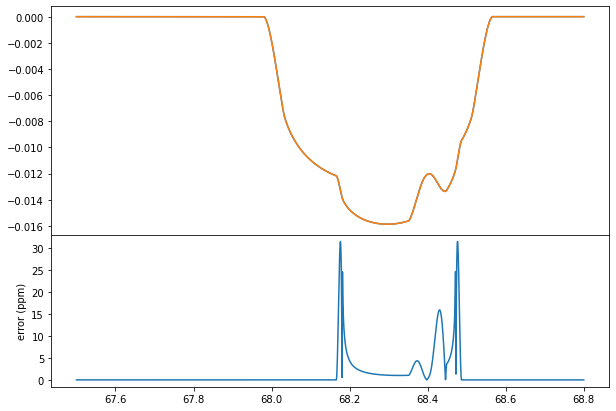

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(10, 7), sharex=True, gridspec_kw={'height_ratios': [0.6, 0.4]})
plt.subplots_adjust(hspace=0.0)
axs[0].plot(t, lc_luna)
axs[0].plot(t, lc_gefera)
axs[1].plot(t, np.abs(lc_luna - lc_gefera) * 1e6)
axs[1].set_ylabel('error (ppm)')

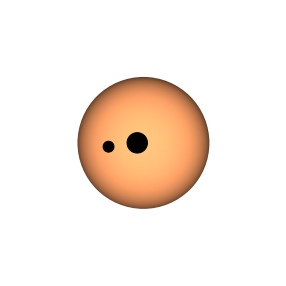

In [6]:
fig = plt.figure(figsize=(5, 5))
sys.draw(fig.gca(), 68.25, 0.15, 0.08, ld_params=(u1, u2), fill=True)

In [7]:
t = np.linspace(183.5, 185.3, 100000)
au_r = 215.03215567054764

ap = 317.9 / au_r
tp = 0.0
ep = 0.0
pp = 737.1131
wp = 0.01 * np.pi / 180
ip = 90.0 * np.pi / 180

am = 0.0818 * 11.7 / au_r
tm = 0.0
em = 0.0
pm = 4.6
om = 0.01 * np.pi / 180
wm = 90 * np.pi / 180
im = 0.0 * np.pi / 180
mm = 0.11

u1 = 0.5
u2 = 0.3
rp = 0.0818 
rm = rp * 0.263

In [8]:
rm

0.021513400000000002

In [9]:
bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(bo, mo)
lc_gefera = sys.lightcurve(t, u1, u2, rp, rm)

bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = ln.System(bo, mo)
lc_luna = sys.lightcurve(t, u1, u2, rp, rm)

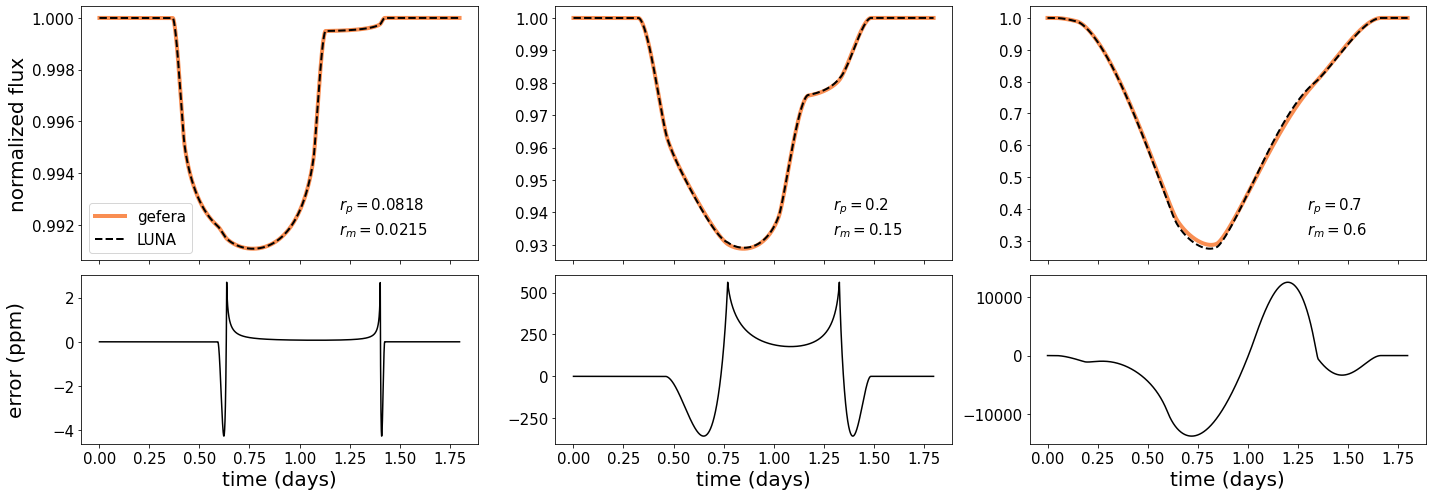

In [10]:
from matplotlib import cm

fig, axs = plt.subplots(2, 3, figsize=(20, 7), sharex=True, gridspec_kw={'height_ratios': [0.6, 0.4]})
plt.subplots_adjust(hspace=0.0)

rp = 0.0818 
rm = rp * 0.263

bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(bo, mo)
lc_gefera = sys.lightcurve(t, u1, u2, rp, rm)

bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = ln.System(bo, mo)
lc_luna = sys.lightcurve(t, u1, u2, rp, rm)

axs[0][0].plot(t - np.min(t), lc_gefera + 1, color=cm.Spectral(0.25), linewidth=4, label='gefera')
axs[0][0].plot(t - np.min(t), lc_luna + 1, color='k', linewidth=2, linestyle='--', label='LUNA')
axs[1][0].plot(t - np.min(t), (lc_luna - lc_gefera) * 1e6, color='k')

axs[0][0].legend(fontsize=15)

axs[1][0].set_ylabel('error (ppm)\n', fontsize=20)
axs[1][0].set_xlabel('time (days)', fontsize=20)
axs[0][0].set_ylabel('normalized flux', fontsize=20)

axs[0][0].tick_params(axis='both', which='major', labelsize=15)
axs[1][0].tick_params(axis='both', which='major', labelsize=15)

axs[0][0].annotate(r'$r_p = 0.0818$', xy=(0.65, 0.2), xycoords='axes fraction', fontsize=15)
axs[0][0].annotate(r'$r_m=0.0215$', xy=(0.65, 0.1), xycoords='axes fraction', fontsize=15)

#------------------------------------------------------------

rp = 0.2 
rm = 0.15

bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(bo, mo)
lc_gefera = sys.lightcurve(t, u1, u2, rp, rm)

bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = ln.System(bo, mo)
lc_luna = sys.lightcurve(t, u1, u2, rp, rm)

axs[0][1].plot(t - np.min(t), lc_gefera + 1, color=cm.Spectral(0.25), linewidth=4)
axs[0][1].plot(t - np.min(t), lc_luna + 1, color='k', linewidth=2, linestyle='--')
axs[1][1].plot(t - np.min(t), (lc_luna - lc_gefera) * 1e6, color='k')

#axs[1][1].set_ylabel('error (ppm)\n', fontsize=20)
axs[1][1].set_xlabel('time (days)', fontsize=20)
#axs[0][1].set_ylabel('normalized flux', fontsize=20)

axs[0][1].tick_params(axis='both', which='major', labelsize=15)
axs[1][1].tick_params(axis='both', which='major', labelsize=15)

axs[0][1].annotate(r'$r_p = 0.2$', xy=(0.7, 0.2), xycoords='axes fraction', fontsize=15)
axs[0][1].annotate(r'$r_m=0.15$', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=15)

#---------------------------------------------------------------

rp = 0.7
rm = 0.6

bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.System(bo, mo)
lc_gefera = sys.lightcurve(t, u1, u2, rp, rm)

bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm, om, wm, im, mm)
sys = ln.System(bo, mo)
lc_luna = sys.lightcurve(t, u1, u2, rp, rm)

axs[0][2].plot(t - np.min(t), lc_gefera + 1, color=cm.Spectral(0.25), linewidth=4)
axs[0][2].plot(t - np.min(t), lc_luna + 1, color='k', linewidth=2, linestyle='--')
axs[1][2].plot(t - np.min(t), (lc_luna - lc_gefera) * 1e6, color='k')

#axs[1][2].set_ylabel('error (ppm)\n', fontsize=20)
axs[1][2].set_xlabel('time (days)', fontsize=20)
#axs[0][2].set_ylabel('normalized flux', fontsize=20)

axs[0][2].tick_params(axis='both', which='major', labelsize=15)
axs[1][2].tick_params(axis='both', which='major', labelsize=15)

axs[0][2].annotate(r'$r_p = 0.7$', xy=(0.7, 0.2), xycoords='axes fraction', fontsize=15)
axs[0][2].annotate(r'$r_m = 0.6$', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=15)

plt.tight_layout()
plt.savefig('/Users/tgordon/Desktop/luna_comparison_1708b.pdf')

In [11]:
t = np.linspace(183.5, 185.3, 1000000)

d = 0.00001
rp = 0.0818
rm = rp * 0.263
rp = 0.2 
rm = 0.15

bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm + d, om, wm, im, mm)
sys1 = gf.System(bo, mo)
bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm - d, om, wm, im, mm)
sys2 = gf.System(bo, mo)

lc_gefera1 = sys1.lightcurve(t, u1, u2, rp, rm)
lc_gefera2 = sys2.lightcurve(t, u1, u2, rp, rm)

bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm + d, om, wm, im, mm)
sys1 = ln.System(bo, mo)
bo = ln.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = ln.MoonOrbit(am, tm, em, pm - d, om, wm, im, mm)
sys2 = ln.System(bo, mo)

lc_luna1 = sys1.lightcurve(t, u1, u2, rp, rm)
lc_luna2 = sys2.lightcurve(t, u1, u2, rp, rm)

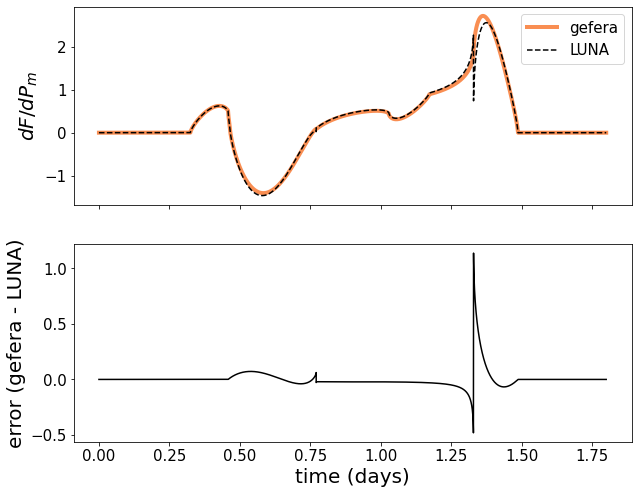

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

dlc_gefera = (lc_gefera1 - lc_gefera2) / (2 * d)
dlc_luna = (lc_luna1 - lc_luna2) / (2 * d)
axs[0].plot(t - np.min(t), dlc_gefera, '-', color=cm.Spectral(0.25), linewidth=4, label='gefera')
axs[0].plot(t - np.min(t), dlc_luna, '--', color='k', label='LUNA')
axs[1].plot(t - np.min(t), dlc_gefera - dlc_luna, color='k')
axs[0].legend(fontsize=15)

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

axs[0].set_ylabel(r'$dF / dP_m$', fontsize=20)
axs[1].set_ylabel('error (gefera - LUNA)', fontsize=20)
axs[1].set_xlabel('time (days)', fontsize=20)

plt.savefig('/Users/tgordon/Desktop/LUNA_derivative.pdf')

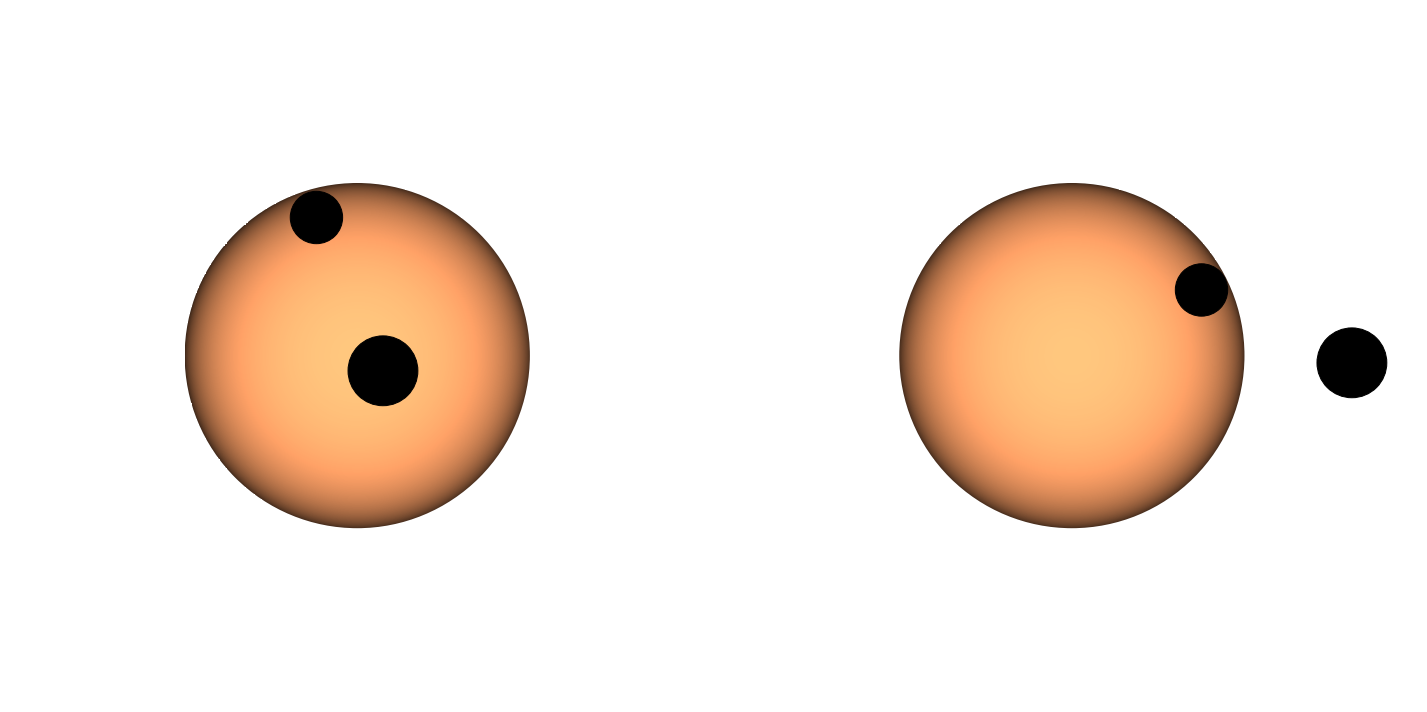

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm + d, om, wm, im, mm)
sys1 = gf.System(bo, mo)
sys1.draw(axs[0], t.min() + 0.8, rp, rm, ld_params=(u1, u2))

bo = gf.BarycenterOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.MoonOrbit(am, tm, em, pm + d, om, wm, im, mm)
sys1 = gf.System(bo, mo)
sys1.draw(axs[1], t.min() + 1.32, rp, rm, ld_params=(u1, u2))

plt.tight_layout()
plt.savefig('/Users/tgordon/Desktop/LUNA_contact.pdf')

In [ ]:
t